In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import nltk 
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.corpus import swadesh #Traducir

In [2]:
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /home/cesar/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [3]:
corpus = nltk.corpus.cess_esp.sents()

In [4]:
print(corpus[:1])
print('\nSize of the list:',len(corpus))

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']]

Size of the list: 6030


Hacer que todos los tokens esten en una sola lista, y no una lista de listas

In [5]:
flatten = [w for l in corpus for w in l]

In [6]:
print(flatten[:20])
len(flatten)

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


192686

# Construir un tokenizador

In [7]:
texto = """ Cuando sea el rey del mundo (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas. 
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera 
            visualizar en su cabeza ...""" 

In [8]:
re.split(r'[\s\W]+',texto)

['',
 'Cuando',
 'sea',
 'el',
 'rey',
 'del',
 'mundo',
 'imaginaba',
 'él',
 'en',
 'su',
 'cabeza',
 'no',
 'tendré',
 'que',
 'preocuparme',
 'por',
 'estas',
 'bobadas',
 'Era',
 'solo',
 'un',
 'niño',
 'de',
 '7',
 'años',
 'pero',
 'pensaba',
 'que',
 'podría',
 'ser',
 'cualquier',
 'cosa',
 'que',
 'su',
 'imaginación',
 'le',
 'permitiera',
 'visualizar',
 'en',
 'su',
 'cabeza',
 '']

In [9]:
texto = 'En los E.U. esa postal vale $15.50 ...'

Para textos más complejos tengo que utilizar expresiones regulares más elaboradas. NLTK tiene una funcioón para toenizar basada en expresiones regulares

In [10]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [11]:
nltk.regexp_tokenize(texto,pattern)

['En', 'los', 'E.U.', 'esa', 'postal', 'vale', '$15.50', '...']

In [12]:
nltk.tokenize.line_tokenize(texto)

['En los E.U. esa postal vale $15.50 ...']

# Riqueza lexica en un texto

$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [13]:
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/cesar/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /home/cesar/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/cesar/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/cesar/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/cesar/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/cesar/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |

True

In [14]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [15]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [16]:
len(text1)

260819

In [17]:
unique_words = sorted(set(text1))

In [18]:
r = (len(unique_words)/len(text1))*100
print(f'La riqueza lexica de {text1.name} es: {round(r,2)}%')

La riqueza lexica de Moby Dick by Herman Melville 1851 es: 7.41%


In [19]:
def riqueza_lexica(text):
    unique_words = sorted(set(text))
    r = (len(unique_words)/len(text))*100
    return round(r,3)

In [20]:
riqueza_lexica(text2)

4.826

Crear la función del porcentaje de aparición de una palabra en todo el texto

In [21]:
def porcentaje_aparicion(palabra,text):
    aparicion = text.count(palabra)
    return round((aparicion/len(text))*100, 3)

In [22]:
porcentaje_aparicion('monster',text1)

0.019

# Distribuciones de frecuencia

Para calcular las frecuencias sin ninguna función se haría de la siguiete manera

In [23]:
import timeit

In [24]:
dict_words = {w:text1.count(w) for w in sorted(set(text1))}

In [25]:
start_time = timeit.default_timer()
{w:text1.count(w) for w in sorted(set(text1))}
round(timeit.default_timer() - start_time,3)

49.307

El costo computacional es muy alto, por lo que lo mejor es utilizar una función de nltk

In [26]:
start_time = timeit.default_timer()
FreqDist(text1)
round(timeit.default_timer() - start_time,3)

0.141

In [27]:
fdist = FreqDist(text1)

In [28]:
#The most common words
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

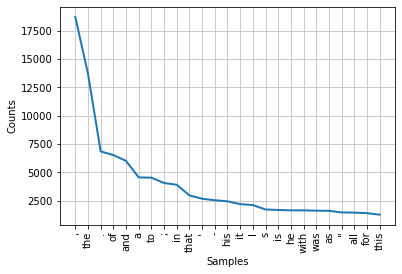

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
fdist.plot(25)

## Analizando las palabras interesantes

In [30]:
interesting_words = [(w,fdist[w]) for w in set(text1) if re.search(r'[\w]+',w) and w not in stopwords.words('english') and fdist[w]>10 and len(w)>2]

In [31]:
interesting_words[1]

('ran', 24)

In [32]:
dtypes = [('word','S10'),('frequency',int)]
interesting_words = np.array(interesting_words,dtype=dtypes)

Organizar por las frecuencias

In [33]:
interesting_words = np.sort(interesting_words,order='frequency')
interesting_words = interesting_words[::-1]

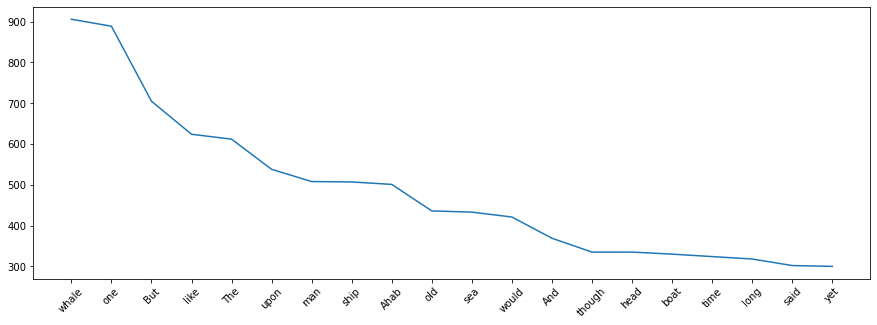

In [34]:
top = 20
x = [y[0] for y in interesting_words[:top]]
y = [y[1] for y in interesting_words[:top]]
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

In [35]:
interesting_words

array([(b'whale', 906), (b'one', 889), (b'But', 705), ..., (b'Didn',  11),
       (b'Are',  11), (b'America',  11)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

# N-gramas

## Bi-gramns

Calcular los bigramas

In [36]:
bigrams_list = list(bigrams(text1))
#Filtro los caracteres que no me interesan 
bigrams_filtered = [b for b in bigrams_list if len(b[0])>1 and len(b[1])>1]
#Calculo la frecuencia de los bigramas filtrados
freq_bigrams = FreqDist(bigrams_filtered)
freq_bigrams.most_common(10)

[(('of', 'the'), 1847),
 (('in', 'the'), 1120),
 (('to', 'the'), 712),
 (('from', 'the'), 428),
 (('of', 'his'), 371),
 (('the', 'whale'), 369),
 (('and', 'the'), 357),
 (('on', 'the'), 326),
 (('to', 'be'), 320),
 (('at', 'the'), 316)]

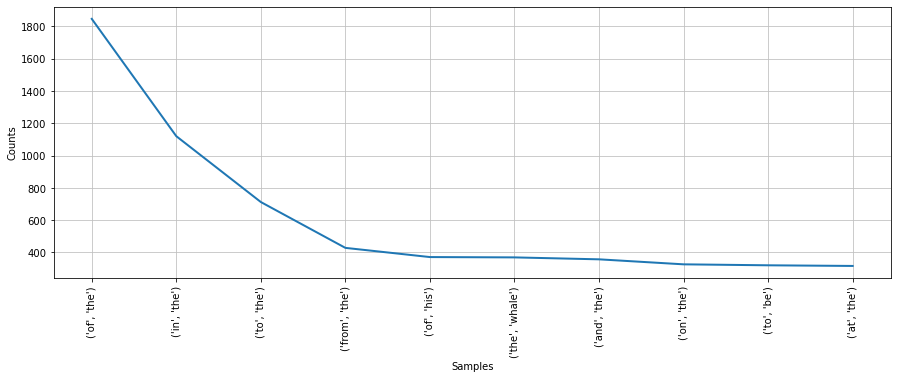

In [37]:
plt.figure(figsize=(15,5))
freq_bigrams.plot(10)
plt.show()

## Tri-gramns

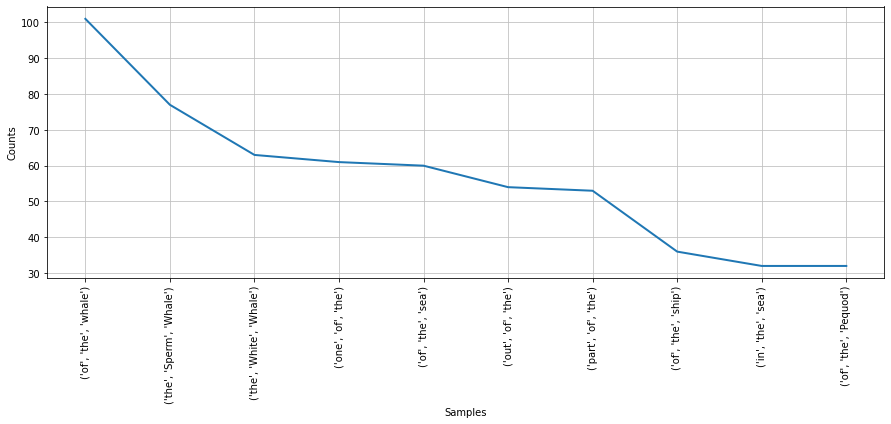

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
trigrams = list(ngrams(text1,3))
#Filtro los caracteres que no me interesan 
trigrams_filtered = [b for b in trigrams if len(b[0])>1 and len(b[1])>1 and len(b[2])>1]
#Calculo la frecuencia de los bigramas filtrados
freq_trigrams = FreqDist(trigrams_filtered)
plt.figure(figsize=(15,5))
freq_trigrams.plot(10)

# Colocaciones

## Pointwise Mutual Information (PMI)


Una métrica basada en la teoria de la información para encontar Collocations

$$\Large PMI = log\frac {P(w_1,w_2)}{P(w_1)P(w_2)}$$

Los tokens que presenten un PMI más alto se pueden considerar colocaciones

In [39]:
bigrams_list = list(bigrams(text1))
#Filtro los caracteres que no me interesan 
bigrams_filtered = [b for b in bigrams_list if len(b[0])>1 and len(b[1])>1]
freq_bigrams = FreqDist(bigrams_filtered)

words_filtered = [w for w in text1 if len(w)>1]
freq_words = FreqDist(words_filtered)


df = pd.DataFrame()
df['bigramns'] = bigrams_filtered
df['word_0'] = df['bigramns'].apply(lambda x : x[0])
df['word_1'] = df['bigramns'].apply(lambda x : x[1])
df['bigramns_freq'] = df['bigramns'].apply(lambda x : freq_bigrams[x])
df['word_0_freq'] = df['word_0'].apply(lambda x : freq_words[x])
df['word_1_freq'] = df['word_1'].apply(lambda x : freq_words[x])

In [40]:
df['PMI'] = df[['bigramns_freq','word_0_freq','word_1_freq']].apply(lambda x : np.log2(x[0]/(x[1]*x[2])), axis =1)

In [41]:
df

,bigramns,word_0,word_1,bigramns_freq,word_0_freq,word_1_freq,PMI
0,"(Moby, Dick)",Moby,Dick,83,84,84,-6.409595
1,"(Dick, by)",Dick,by,1,84,1137,-16.543334
2,"(by, Herman)",by,Herman,1,1137,1,-10.151017
3,"(Herman, Melville)",Herman,Melville,1,1,1,0.000000
4,"(Melville, 1851)",Melville,1851,1,1,3,-1.584963
...,...,...,...,...,...,...,...
170235,"(her, missing)",her,missing,1,329,16,-12.361944
170236,"(missing, children)",missing,children,1,16,18,-8.169925
170237,"(only, found)",only,found,4,360,115,-13.337343
170238,"(found, another)",found,another,1,115,106,-13.573411


In [42]:
df['PMI'] = df[['bigramns','word_0','word_1']].apply(lambda x : np.log2(freq_bigrams[x[0]]/(freq_words[x[1]]*freq_words[x[2]])), axis =1)

In [43]:
df.sort_values(by='PMI', ascending=False)

,bigramns,word_0,word_1,bigramns_freq,word_0_freq,word_1_freq,PMI
140758,"(spontaneous, literal)",spontaneous,literal,1,1,1,0.000000
75927,"(Mohawk, counties)",Mohawk,counties,1,1,1,0.000000
46713,"(Moorish, scimetars)",Moorish,scimetars,1,1,1,0.000000
119800,"(penal, gout)",penal,gout,1,1,1,0.000000
119713,"(Daniel, Boone)",Daniel,Boone,1,1,1,0.000000
...,...,...,...,...,...,...,...
11172,"(the, by)",the,by,1,13721,1137,-23.895115
38443,"(the, at)",the,at,1,13721,1231,-24.009713
97679,"(the, as)",the,as,1,13721,1620,-24.405876
138382,"(of, to)",of,to,1,6536,4542,-24.823304


El PMI no nos basta como única métrica para determinar una colocación, esta métrica debe ser acompañada con la frecuencia del bigrama para que tenga sentido. De esta manera los bigramas serán aquellos bigramas que tengan un PMI alto y una frecuencia de aparición alta

In [44]:
# Para comparar adecuadamente el PMI y la frecuencia de aparición de los bigramas, tienen que estar en la misma escala. Ya que el PMI esta en una escala logarítmica, puedo hacer lo mismo con la fecuencia
df['bigramns_freq_log'] = df['bigramns_freq'].apply(lambda x : np.log2(x))

In [47]:
# fig = px.scatter(x=df['bigramns_freq_log'], y=df['PMI'], color = df['PMI']+df['bigramns_freq_log'], hover_name= df['bigramns'].values, 
#                 width = 600, height= 600, labels= {'x':'PMI','y':'Log(Bigrams frecuency)'})
# fig.show()

EL bigrama que tiene un mayor PMI y al mismo tiempo cuenta con una alta frecuencia es "('Moby','Dick')"

## Medidas pre-construidas

In [58]:
bigram_mesure =  nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [60]:
finder.apply_freq_filter(20) #Aplico un filtro para que solo aparezacan las colocaciones que tengan más de n (20) apariciones
finder.nbest(bigram_mesure.pmi, 20) #Le paso la metrica y el número de colocaciones que quiere que me arroje

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other'),
 (',"', 'cried'),
 ('let', 'us'),
 ('on', 'board'),
 ('at', 'least'),
 ('sperm', 'whale'),
 ('cried', 'Stubb'),
 ('an', 'instant'),
 ('be', 'sure'),
 ('Captain', 'Ahab'),
 ('once', 'more')]

## Texto en español

In [62]:
corpus = nltk.corpus.cess_esp.sents()
flatten = [w for l in corpus for w in l]

In [63]:
flatten[:20]

['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',',
 'jueves',
 ',',
 'la',
 'compra',
 'del',
 '51_por_ciento',
 'de',
 'la',
 'empresa',
 'mexicana']

In [64]:
finder = BigramCollocationFinder.from_words(flatten)
finder.apply_freq_filter(20)
finder.nbest(bigram_mesure.pmi,10)

[('secretario', 'general'),
 ('primer', 'ministro'),
 ('informó', 'hoy'),
 ('año', 'pasado'),
 ('este', 'año'),
 ('cinco', 'años'),
 ('ha', 'sido'),
 ('desde', 'hace'),
 ('han', 'sido'),
 ('puede', 'ser')]

In [65]:
finder = BigramCollocationFinder.from_documents(corpus) #From documents es cuando los token estan en una lista de listas
finder.apply_freq_filter(20)
finder.nbest(bigram_mesure.pmi,10)

[('secretario', 'general'),
 ('primer', 'ministro'),
 ('informó', 'hoy'),
 ('año', 'pasado'),
 ('este', 'año'),
 ('cinco', 'años'),
 ('ha', 'sido'),
 ('desde', 'hace'),
 ('han', 'sido'),
 ('puede', 'ser')]

# Recursos léxicos

## Traductor

In [2]:
# Ver los idiomas disponibles
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [5]:
len(swadesh.words('en'))

207

In [7]:
en2es = swadesh.entries(['en','es'])

In [8]:
translate = dict(en2es)

In [11]:
translate

{'I': 'yo',
 'you (singular), thou': 'tú, usted',
 'he': 'él',
 'we': 'nosotros',
 'you (plural)': 'vosotros, ustedes',
 'they': 'ellos, ellas',
 'this': 'este',
 'that': 'ese, aquel',
 'here': 'aquí, acá',
 'there': 'ahí, allí, allá',
 'who': 'quien',
 'what': 'que',
 'where': 'donde',
 'when': 'cuando',
 'how': 'como',
 'not': 'no',
 'all': 'todo',
 'many': 'muchos',
 'some': 'algunos, unos',
 'few': 'poco',
 'other': 'otro',
 'one': 'uno',
 'two': 'dos',
 'three': 'tres',
 'four': 'cuatro',
 'five': 'cinco',
 'big': 'grande',
 'long': 'largo',
 'wide': 'ancho',
 'thick': 'gordo',
 'heavy': 'pesado',
 'small': 'pequeño',
 'short': 'corto',
 'narrow': 'estrecho, angosto',
 'thin': 'delgado, flaco',
 'woman': 'mujer',
 'man (adult male)': 'hombre',
 'man (human being)': 'hombre',
 'child': 'niño',
 'wife': 'esposa, mujer',
 'husband': 'esposo, marido',
 'mother': 'madre',
 'father': 'padre',
 'animal': 'animal',
 'fish': 'pez, pescado',
 'bird': 'ave, pájaro',
 'dog': 'perro',
 'louse'

In [14]:
translate['new']

'nuevo'